In [7]:
%%capture
!apt-get install imagemagick

In [8]:
try:
    import matplotlib.pyplot as plt
    from matplotlib.animation import FuncAnimation
    plt.rcParams['animation.writer'] = 'imagemagick'
    MATPLOTLIB_AVAILABLE = True
except ImportError:
    MATPLOTLIB_AVAILABLE = False



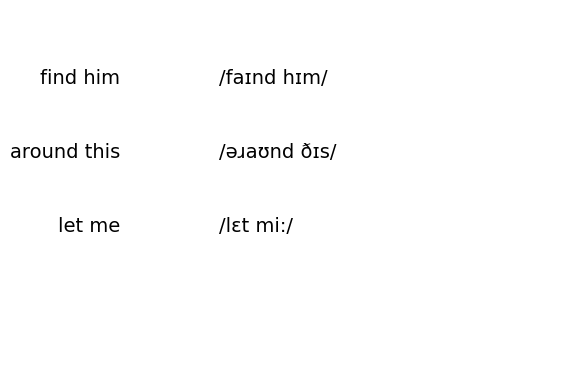

In [15]:
import numpy as np

# Check if matplotlib is installed and handle gracefully if it's not
try:
    import matplotlib.pyplot as plt
    from matplotlib.animation import FuncAnimation
    MATPLOTLIB_AVAILABLE = True
except ImportError:
    MATPLOTLIB_AVAILABLE = False

if MATPLOTLIB_AVAILABLE:
    # Define the phrases and their phonetic representations
    phrases = ["find him", "around this", "let me"]
    phonemes = ["/faɪnd hɪm/", "/əɹaʊnd ðɪs/", "/lɛt mi:/"]
    deletions = [[4, 5, 6], [2, 3, 4], [1]]  # Corrected deletion indexes
    highlight_indices = [[2], [2], [2]]  # Corrected indices for red highlights

    # Create the figure and axes
    fig, ax = plt.subplots()
    ax.axis('off')  # Turn off the axes
    texts = []
    full_texts = []  # Store the full phoneme sequences

    # Initialize display positions
    y_offset = 0.8
    for phrase, phonetic in zip(phrases, phonemes):
        ax.text(0.1, y_offset, phrase, fontsize=14, ha='right', transform=ax.transAxes)
        text_obj = ax.text(0.3, y_offset, phonetic, fontsize=14, ha='left', color='black', transform=ax.transAxes)
        texts.append(text_obj)
        full_texts.append(list(phonetic))
        y_offset -= 0.2

    # Update function for animation
    def update(frame):
        for i, (text, phonetic, del_indices, highlight) in enumerate(zip(texts, full_texts, deletions, highlight_indices)):
            current_text = list(phonetic)

            if frame == 0:
                # Step 1: Display everything in black
                text.set_text(''.join(current_text))
                text.set_color('black')

            elif frame == 1:
                # Step 2: Highlight relevant letters in red
                for idx in highlight:
                    current_text[idx] = f"{current_text[idx]}"
                text.set_text(''.join(current_text))
                text.set_color('black')

            elif frame == 2:
                # Step 3: Highlight phonemes for deletion in red
                for idx in del_indices:
                    current_text[idx] = f"{current_text[idx]}"
                text.set_text(''.join(current_text))
                text.set_color('red')

            elif frame == 3:
                # Step 4: Remove the highlighted phonemes
                for idx in del_indices:
                    current_text[idx] = ''
                text.set_text(''.join(current_text))
                text.set_color('black')

            elif frame == 4:
                # Step 5: Slide the remaining phonemes together
                compacted_text = ''.join([char for char in current_text if char != ''])
                text.set_text(compacted_text)
                text.set_color('black')

    # Set up animation
    anim = FuncAnimation(
        fig, update, frames=5, interval=1000, repeat=False
    )

    # Save the animation
    anim.save('phoneme_deletion.gif', writer='imagemagick')

    plt.show()
else:
    print("Matplotlib is not installed. Please install matplotlib to run this script.")
